In [1]:
import os
import pandas as pd

import pathlib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf



from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from tensorflow import keras

In [2]:
# project specific
from utils import data_handler
from utils.models import vanilla_autoencoder

In [3]:
x_train, filenames = data_handler.generate_dataset(feature_selection_threshold = 5, retain_phases="2", return_filenames= True)

retained phase 2
loading samples...
loaded 39 samples
number of genes selected :  5257


In [4]:
latent_dim = 64
t_shape = (6161)


autoencoder = vanilla_autoencoder.generate_model(t_shape, latent_dim)
autoencoder.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())

In [8]:
hist = autoencoder.fit(x_train, epochs=10000, shuffle=False)

Epoch 1/10000
1/1 [==============================] - 0s 30ms/step - loss: 16774.8125
Epoch 2/10000
1/1 [==============================] - 0s 8ms/step - loss: 16745.3730
Epoch 3/10000
1/1 [==============================] - 0s 8ms/step - loss: 16737.1328
Epoch 4/10000
1/1 [==============================] - 0s 12ms/step - loss: 16718.3477
Epoch 5/10000
1/1 [==============================] - 0s 11ms/step - loss: 16709.4355
Epoch 6/10000
1/1 [==============================] - 0s 12ms/step - loss: 16724.5176
Epoch 7/10000
1/1 [==============================] - 0s 11ms/step - loss: 16675.3535
Epoch 8/10000
1/1 [==============================] - 0s 8ms/step - loss: 16669.5801
Epoch 9/10000
1/1 [==============================] - 0s 8ms/step - loss: 16656.1797
Epoch 10/10000
1/1 [==============================] - 0s 6ms/step - loss: 16653.6504
Epoch 11/10000
1/1 [==============================] - 0s 7ms/step - loss: 16616.2031
Epoch 12/10000
1/1 [==============================] - 0s 8ms/step - l

[16774.8125, 16745.373046875, 16737.1328125, 16718.34765625, 16709.435546875, 16724.517578125, 16675.353515625, 16669.580078125, 16656.1796875, 16653.650390625, 16616.203125, 16639.9609375, 16602.658203125, 16592.146484375, 16587.154296875, 16601.1640625, 16579.951171875, 16566.263671875, 16557.5390625, 16534.330078125, 16533.990234375, 16515.0390625, 16463.8671875, 16450.8203125, 16410.38671875, 16396.107421875, 16363.771484375, 16348.05078125, 16336.1025390625, 16354.6162109375, 16299.3818359375, 16285.603515625, 16269.7802734375, 16253.4541015625, 16241.2041015625, 16221.8603515625, 16205.400390625, 16196.3212890625, 16178.2841796875, 16176.353515625, 16158.0791015625, 16137.4228515625, 16130.400390625, 16118.0439453125, 16112.6162109375, 16113.54296875, 16099.4970703125, 16085.916015625, 16079.271484375, 16063.57421875, 16060.2958984375, 16032.2998046875, 16020.125, 16003.0458984375, 15970.5166015625, 15954.896484375, 15928.71875, 15908.5625, 15889.59375, 15879.0341796875, 15857.26

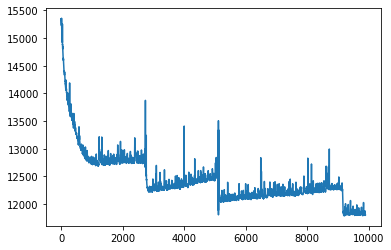

In [9]:
plt.plot(hist.history['loss'][100:])
print(hist.history['loss'])


In [18]:
autoencoder.encoder.save('../workfiles/simple_autoencoer_model')


INFO:tensorflow:Assets written to: ../workfiles/simple_autoencoer_model/assets


In [19]:
compressed_dataframe = autoencoder.encoder.predict(x_train)

45/45 [==============================] - 0s 2ms/step


In [20]:
df = pd.DataFrame(compressed_dataframe)
df["name"] = filenames

In [21]:
df.to_csv("../workfiles/compressed_data_simple_autoencoder_phase_2.csv")
